<a href="https://colab.research.google.com/github/HACKERDRUNK/coding-interview-university/blob/main/CUSTOMER_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("/content/CustomerDataset.csv")
df.describe()#overview

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,39.075000,393.630000,50.475000
std,57.879185,14.042626,170.715441,25.765065
min,1.000000,16.000000,93.000000,1.000000
25%,50.750000,29.000000,270.500000,32.750000
50%,100.500000,36.500000,399.500000,50.000000
75%,150.250000,49.000000,501.250000,72.250000
max,200.000000,74.000000,896.000000,99.000000


In [11]:
df.isnull().sum()#check null vlaues

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

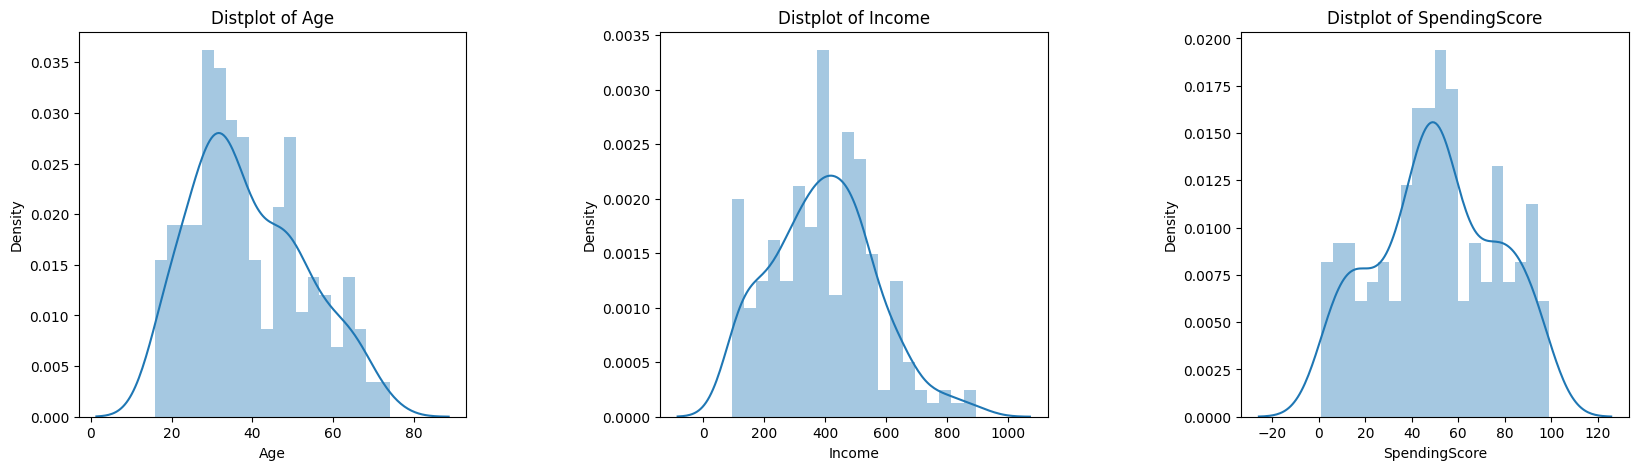

In [12]:
#distribution of numerical data
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ['Age' , 'Income' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

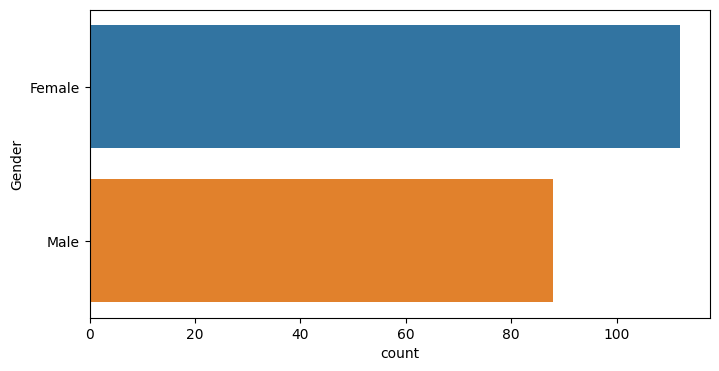

In [13]:
#gender count
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Gender' , data = df)
plt.show()

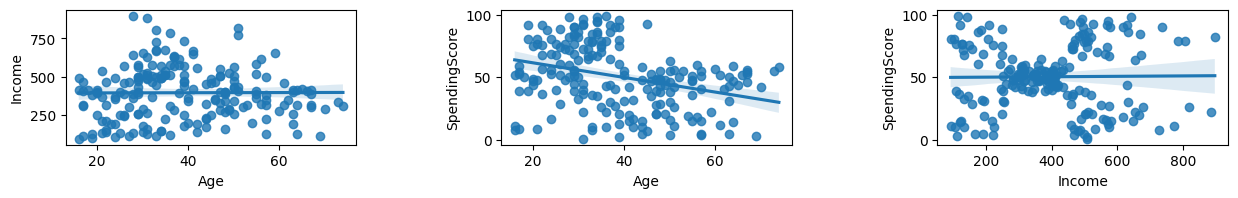

In [40]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for y in ['Income', 'SpendingScore']:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.regplot(x='Age', y=y, data=df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.subplot(3, 3, 3)
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
sns.regplot(x='Income', y='SpendingScore', data=df)
plt.ylabel('SpendingScore'.split()[0]+' '+'SpendingScore'.split()[1] if len('SpendingScore'.split()) > 1 else y )
plt.show()


<Axes: xlabel='Age', ylabel='SpendingScore'>

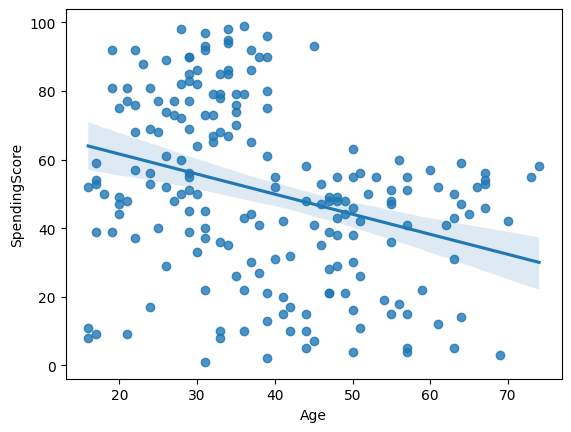

In [15]:
sns.regplot(x='Age', y=y, data=df)

<Axes: xlabel='Income', ylabel='SpendingScore'>

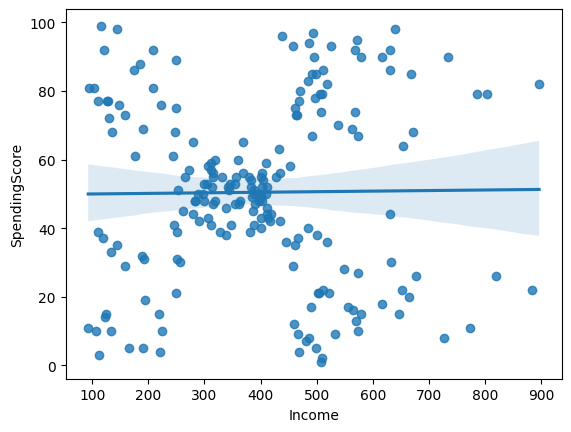

In [16]:
sns.regplot(x='Income', y='SpendingScore', data=df)

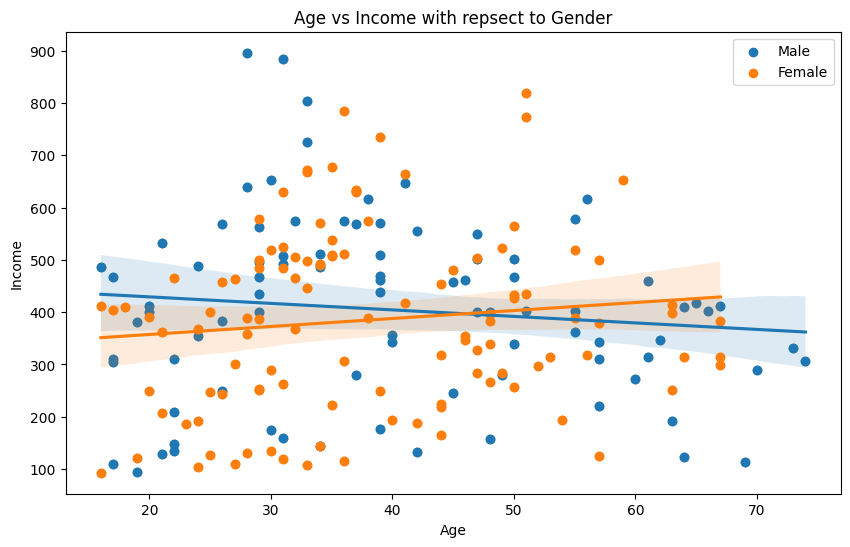

In [17]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Income' , data = df[df['Gender'] == gender] ,label = gender)
    sns.regplot(x = 'Age' , y = 'Income' , data = df[df['Gender'] == gender])
plt.xlabel('Age'), plt.ylabel('Income') 
plt.title('Age vs Income with repsect to Gender')
plt.legend()
plt.show()

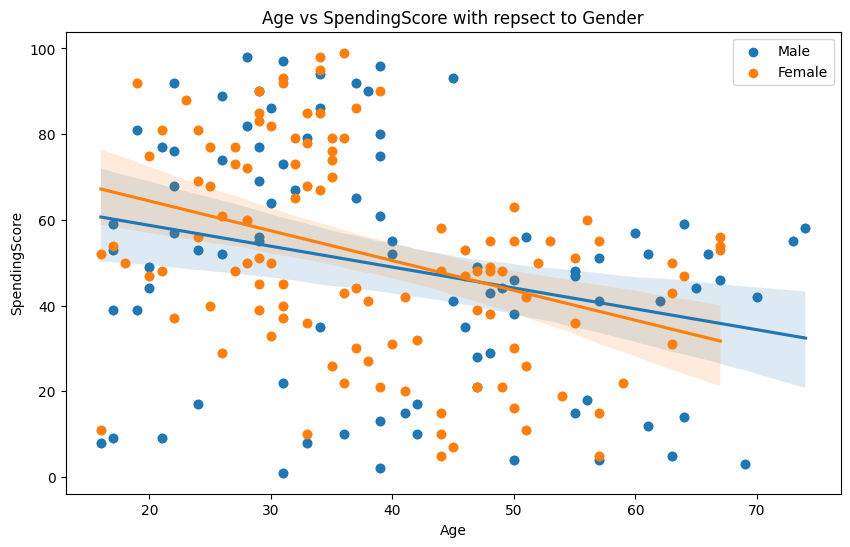

In [18]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'SpendingScore' , data = df[df['Gender'] == gender] ,label = gender)
    sns.regplot(x = 'Age' , y = 'SpendingScore' , data = df[df['Gender'] == gender])
plt.xlabel('Age'), plt.ylabel('SpendingScore') 
plt.title('Age vs SpendingScore with repsect to Gender')
plt.legend()
plt.show()

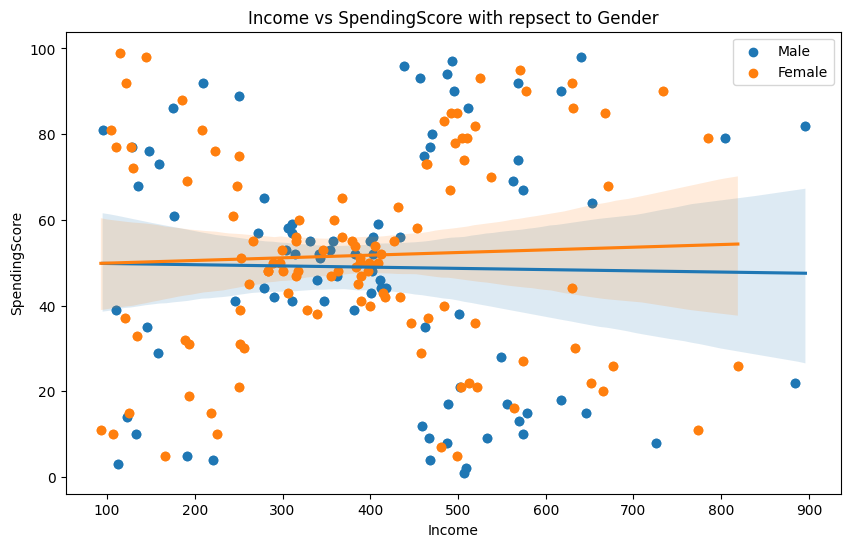

In [19]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Income' , y = 'SpendingScore' , data = df[df['Gender'] == gender] ,label = gender)
    sns.regplot(x = 'Income' , y = 'SpendingScore' , data = df[df['Gender'] == gender])
plt.xlabel('Income'), plt.ylabel('SpendingScore') 
plt.title('Income vs SpendingScore with repsect to Gender')
plt.legend()
plt.show()

In [20]:
#Encode Gender from obj to int
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].astype('int')

In [21]:
df.dtypes

CustomerID       int64
Gender           int64
Age              int64
Income           int64
SpendingScore    int64
dtype: object

Try different combinations to clustering:

Income and Spending Score
Income, Gender and Spending Score
Age, Income, and Spending Score
Age, Income, Gender and Spending Score

Income and Spending Score

In [22]:
X1 = df[['Income' , 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, n_init = 10, random_state = 0))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

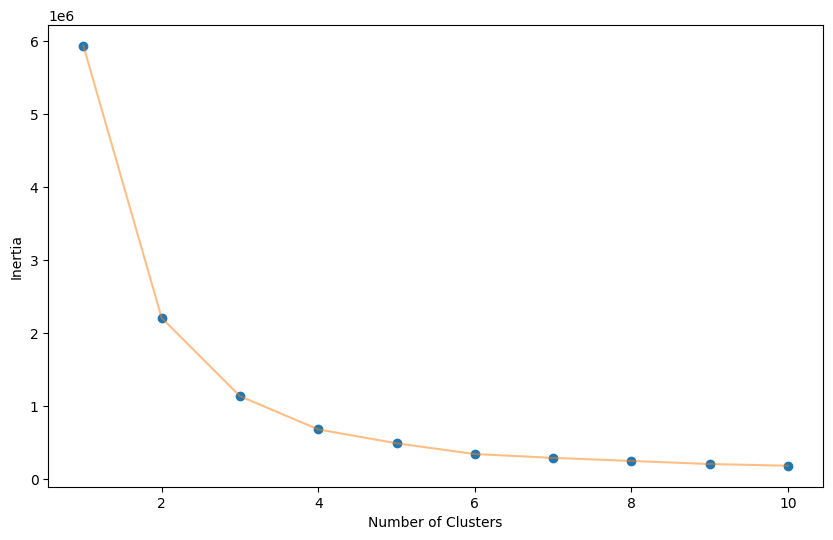

In [23]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [24]:
"""
algorithm = (KMeans(n_clusters = 6, n_init = 10, random_state= 0))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
"""

'\nalgorithm = (KMeans(n_clusters = 6, n_init = 10, random_state= 0))\nalgorithm.fit(X1)\nlabels1 = algorithm.labels_\ncentroids1 = algorithm.cluster_centers_\n'

In [25]:
"""
plt.figure(1, figsize = (10 , 6))
plt.clf()
Z = Z1.reshape(xx.shape)
plt.imshow(Z , interpolation = 'nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter(x = 'Income', y = 'SpendingScore', data = df, c = labels1)
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1])
plt.ylabel('Spending Score'), plt.xlabel('Income')
plt.show()
"""

"\nplt.figure(1, figsize = (10 , 6))\nplt.clf()\nZ = Z1.reshape(xx.shape)\nplt.imshow(Z , interpolation = 'nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),\n           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')\nplt.scatter(x = 'Income', y = 'SpendingScore', data = df, c = labels1)\nplt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1])\nplt.ylabel('Spending Score'), plt.xlabel('Income')\nplt.show()\n"

Income, Gender and Spending Score

In [26]:
X2 = df[['Income', 'Gender', 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, n_init = 10, random_state = 0))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

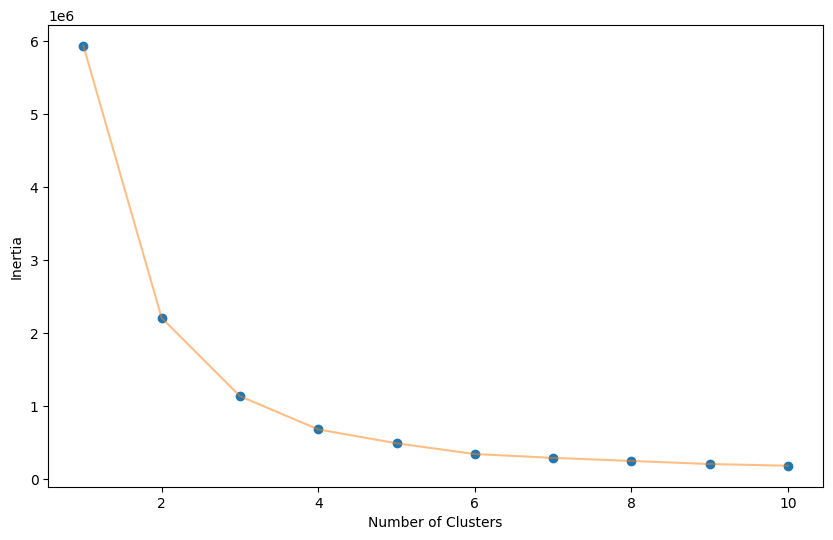

In [27]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [28]:
"""
algorithm = (KMeans(n_clusters = 6, n_init = 10, random_state = 0))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
"""

'\nalgorithm = (KMeans(n_clusters = 6, n_init = 10, random_state = 0))\nalgorithm.fit(X2)\nlabels2 = algorithm.labels_\ncentroids2 = algorithm.cluster_centers_\n'

In [29]:
"""
df['label2'] =  labels2
trace1 = go.Scatter3d(
    x= df['Income'],
    y= df['Gender'],
    z= df['SpendingScore'],
    mode='markers',
     marker=dict(
        color = df['label2'], 
        size= 20,
        line=dict(
            color= df['label2'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Income'),
            yaxis = dict(title  = 'Gender'),
            zaxis = dict(title  = 'SpendingScore')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
"""

"\ndf['label2'] =  labels2\ntrace1 = go.Scatter3d(\n    x= df['Income'],\n    y= df['Gender'],\n    z= df['SpendingScore'],\n    mode='markers',\n     marker=dict(\n        color = df['label2'], \n        size= 20,\n        line=dict(\n            color= df['label2'],\n            width= 12\n        ),\n        opacity=0.8\n     )\n)\ndata = [trace1]\nlayout = go.Layout(\n    title= 'Clusters',\n    scene = dict(\n            xaxis = dict(title  = 'Income'),\n            yaxis = dict(title  = 'Gender'),\n            zaxis = dict(title  = 'SpendingScore')\n        )\n)\nfig = go.Figure(data=data, layout=layout)\npy.offline.iplot(fig)\n"

Age, Income, and Spending Score

In [30]:
X3 = df[['Age', 'Income', 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, n_init = 10, random_state = 0))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

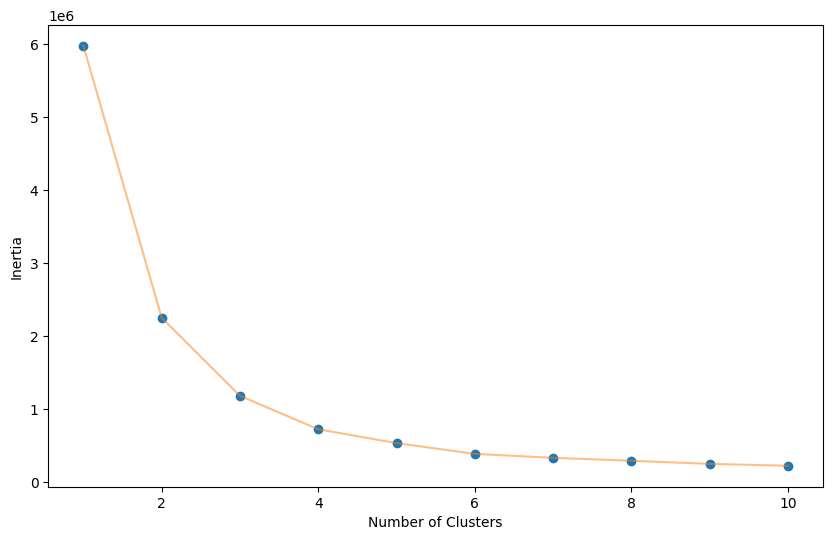

In [31]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [32]:
"""
algorithm = (KMeans(n_clusters = 6, n_init = 10, random_state = 0))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
"""

'\nalgorithm = (KMeans(n_clusters = 6, n_init = 10, random_state = 0))\nalgorithm.fit(X3)\nlabels3 = algorithm.labels_\ncentroids3 = algorithm.cluster_centers_\n'

In [33]:
"""
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Income'],
    z= df['SpendingScore'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'SpendingScore')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
"""

"\ndf['label3'] =  labels3\ntrace1 = go.Scatter3d(\n    x= df['Age'],\n    y= df['Income'],\n    z= df['SpendingScore'],\n    mode='markers',\n     marker=dict(\n        color = df['label3'], \n        size= 20,\n        line=dict(\n            color= df['label3'],\n            width= 12\n        ),\n        opacity=0.8\n     )\n)\ndata = [trace1]\nlayout = go.Layout(\n    title= 'Clusters',\n    scene = dict(\n            xaxis = dict(title  = 'Age'),\n            yaxis = dict(title  = 'Income'),\n            zaxis = dict(title  = 'SpendingScore')\n        )\n)\nfig = go.Figure(data=data, layout=layout)\npy.offline.iplot(fig)\n"

Age, Income, Gender and Spending Score

In [34]:
X4 = df[['Age', 'Income', 'Gender', 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, n_init = 10, random_state = 0))
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

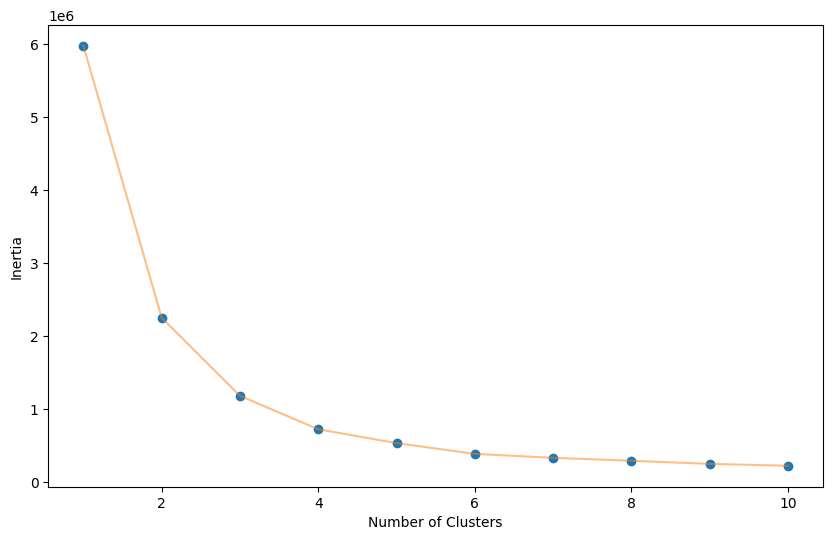

In [35]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [36]:
"""
algorithm = (KMeans(n_clusters = 6, n_init = 10, random_state = 0))
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_
"""

'\nalgorithm = (KMeans(n_clusters = 6, n_init = 10, random_state = 0))\nalgorithm.fit(X4)\nlabels4 = algorithm.labels_\ncentroids4 = algorithm.cluster_centers_\n'

In [37]:
"""
df['label4_1'] =  labels4
trace4 = go.Scatter3d(
    x= df['Age'],
    y= df['Income'],
    z= df['SpendingScore'],
    mode='markers',
     marker=dict(
        color = df['label4'], 
        size= 20,
        line=dict(
            color= df['label4'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace4_1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'SpendingScore')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
"""

"\ndf['label4_1'] =  labels4\ntrace4 = go.Scatter3d(\n    x= df['Age'],\n    y= df['Income'],\n    z= df['SpendingScore'],\n    mode='markers',\n     marker=dict(\n        color = df['label4'], \n        size= 20,\n        line=dict(\n            color= df['label4'],\n            width= 12\n        ),\n        opacity=0.8\n     )\n)\ndata = [trace4_1]\nlayout = go.Layout(\n    title= 'Clusters',\n    scene = dict(\n            xaxis = dict(title  = 'Age'),\n            yaxis = dict(title  = 'Income'),\n            zaxis = dict(title  = 'SpendingScore')\n        )\n)\nfig = go.Figure(data=data, layout=layout)\npy.offline.iplot(fig)\n"

In [38]:
"""
trace4_2 = go.Scatter3d(
    x= df['Gender'],
    y= df['Income'],
    z= df['SpendingScore'],
    mode='markers',
     marker=dict(
        color = df['label4'], 
        size= 20,
        line=dict(
            color= df['label4'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace4_2]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Gender'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'SpendingScore')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
"""

"\ntrace4_2 = go.Scatter3d(\n    x= df['Gender'],\n    y= df['Income'],\n    z= df['SpendingScore'],\n    mode='markers',\n     marker=dict(\n        color = df['label4'], \n        size= 20,\n        line=dict(\n            color= df['label4'],\n            width= 12\n        ),\n        opacity=0.8\n     )\n)\ndata = [trace4_2]\nlayout = go.Layout(\n    title= 'Clusters',\n    scene = dict(\n            xaxis = dict(title  = 'Gender'),\n            yaxis = dict(title  = 'Income'),\n            zaxis = dict(title  = 'SpendingScore')\n        )\n)\nfig = go.Figure(data=data, layout=layout)\npy.offline.iplot(fig)\n"

In [39]:
"""
trace4_3 = go.Scatter3d(
    x= df['Gender'],
    y= df['Age'],
    z= df['SpendingScore'],
    mode='markers',
     marker=dict(
        color = df['label4'], 
        size= 20,
        line=dict(
            color= df['label4'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace4_3]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Gender'),
            yaxis = dict(title  = 'Age'),
            zaxis = dict(title  = 'SpendingScore')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
"""

"\ntrace4_3 = go.Scatter3d(\n    x= df['Gender'],\n    y= df['Age'],\n    z= df['SpendingScore'],\n    mode='markers',\n     marker=dict(\n        color = df['label4'], \n        size= 20,\n        line=dict(\n            color= df['label4'],\n            width= 12\n        ),\n        opacity=0.8\n     )\n)\ndata = [trace4_3]\nlayout = go.Layout(\n    title= 'Clusters',\n    scene = dict(\n            xaxis = dict(title  = 'Gender'),\n            yaxis = dict(title  = 'Age'),\n            zaxis = dict(title  = 'SpendingScore')\n        )\n)\nfig = go.Figure(data=data, layout=layout)\npy.offline.iplot(fig)\n"